In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import numpy as np

from data_science import CompareData
from data_science.analysis_methodology import (
    Autoencoder,
    ClusterAnalysisDivergence,
    DeepAnT_CNN,
    HistogramConsistencyTest,
    ProcessingArchitecture,
)

In [3]:
# load data (download https://1drv.ms/u/s!AuAnQXzLmsvjihFVtI28bX0y0OyW?e=dDug9Y)
data = np.load(
    "data/TESTE01/RespNoiseFiveTEST01.npy"
)
# get dt
dt = data[1, 0] - data[0, 0]

# remove time collum
data = data[:, 1:]

In [4]:
# define methodologies to be used
histogram = HistogramConsistencyTest(
    nominal_rotation=60, filter_type="frequency", p_value_limit=0.05
)

auto_encoder = Autoencoder(size_sub_pack=512,)

deep_ant = DeepAnT_CNN(epochs=2)

adaptative_cluster = ClusterAnalysisDivergence(
    n_channels=True,
    size_sub_sample=256,
    oversampling=True,
    step_to_overlaps=50,
    discriminators=["rms", "kurtosis", "peak value"],
    nb_cluster=6,
    threshold=None,
    sigma=2.5,
    size_buffer=8,
)

In [5]:
processing_architecture = ProcessingArchitecture(
    [histogram, auto_encoder, deep_ant, adaptative_cluster,]
)

In [7]:
# # start comparison

compare_test = CompareData(data, dt, processing_architecture, slice_size=4000)

Number of samples: 5
0 of 5 samples analyzed...
Training with the 2th signal.
Training with the 3th signal.
Training with the 4th signal.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 3999, 32)          96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1999, 32)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1998, 32)          2080      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 999, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 31968)             0         
_________________________________________________________________
dense (Dense)                (None, 40)         

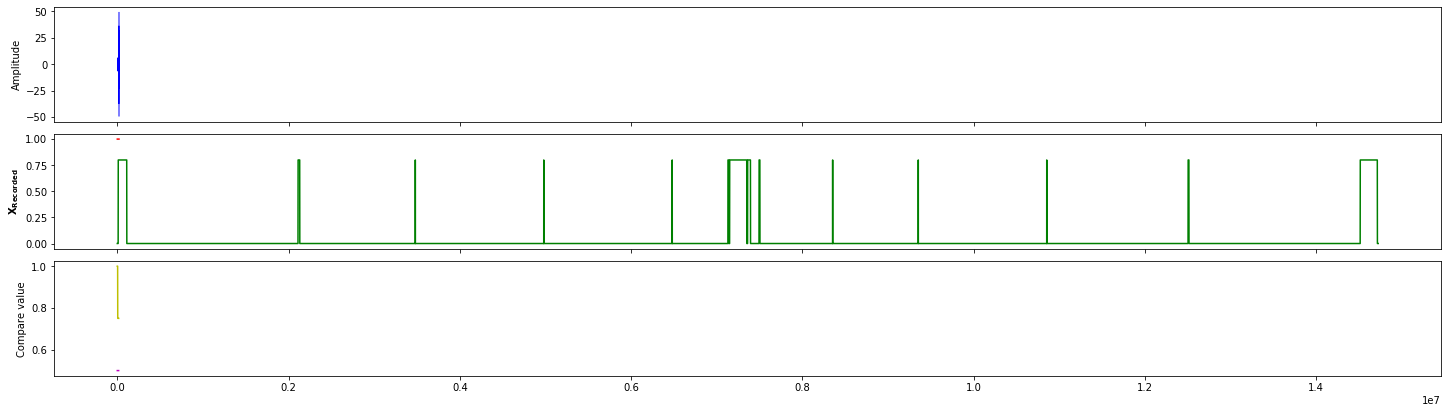

In [12]:
target = np.load("data/TESTE01/Targets.npy")
compare_test.plot(target=target)

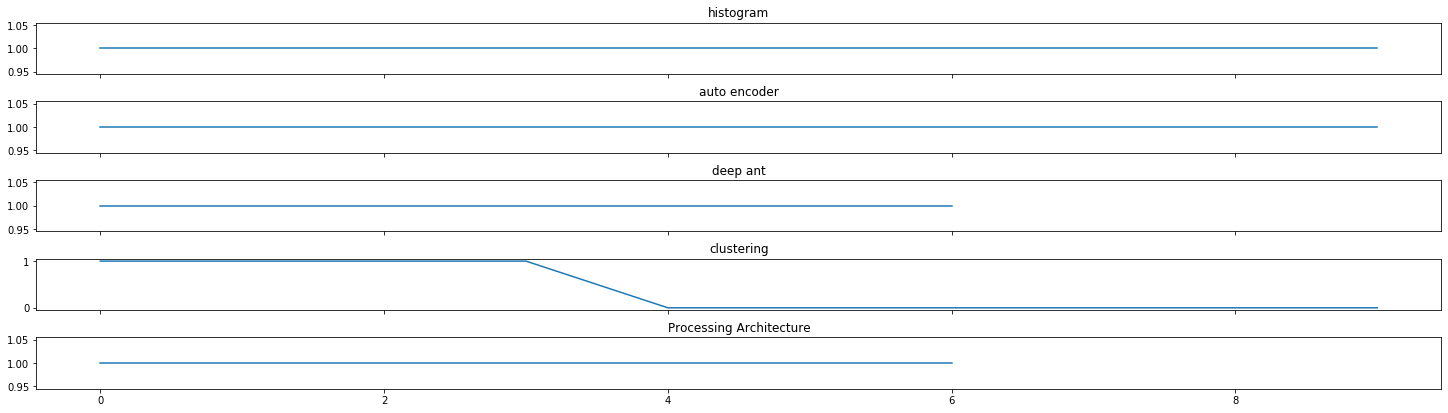

In [13]:
processing_architecture.plot()

In [9]:
metrics = compare_test.get_evaluation_metrics(target)
metrics

{'tn': 3495,
 'fp': 22,
 'fn': 5,
 'tp': 158,
 'accuracy_score': 0.9926630434782608,
 'recall_score': 0.9693251533742331,
 'precision_score': 0.8777777777777778,
 'f1_score': 0.9212827988338192}